In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('data.csv')
df.head()

,IRO_INSTITUTION,PERSON_UID,ID_NUMBER,AGE,CITIZENSHIP_DESC,ETHNICITY,ETHNICITY_DESC,IS_WHITE,GENDER,IS_NON_BINARY,HAWAIIAN_IRO,DEGREE,DEPARTMENT,EDLVL_IRO,FT_PT_STAT,MAJOR_IRO,MAJOR_DESC_IRO,PROGRAM,PROGRAM_DESC
0,MAN,1434565,20495038,27,US Citizen,MX,Mixed Race (2 or more),0,F,1,N,BS,ENGR,JR,FT,PREN,Pre-Engineering,PREN-BS(40),Pre-Engineering-BS
1,MAN,1438044,20582530,28,US Citizen,AA,African American or Black,0,M,1,N,BA,SLSC,SR,FT,BOT,Botany,BOT-BA,Botany-BA
2,MAN,1438757,20587510,28,US Citizen,CA,Caucasian or White,1,M,1,N,BS,ICS,JR,FT,CSCI,Computer Science,CSCI-BS,Computer Science-BS
3,MAN,1435761,20518093,35,Resident Alien,KO,Korean,0,F,1,N,BS,ICS,SR,PT,CSCI,Computer Science,CSCI-BS,Computer Science-BS
4,MAN,1496680,21330902,26,US Citizen,MX,Mixed Race (2 or more),0,M,1,N,BS,PA,SR,FT,PHYS,Physics,PHYS-BS,Physics-BS


In [2]:
df[(df['IS_WHITE'] == 0) & (df['GENDER'] == 'F')]['ETHNICITY_DESC'].value_counts()[:10]

Mixed Race (2 or more)          377
Native Hawaiian or Part-Hawn    315
Filipino                        290
Mixed Asian                     217
Chinese                         137
Japanese                        133
Hispanic                         66
Korean                           62
Vietnamese                       36
African American or Black        34
Name: ETHNICITY_DESC, dtype: int64

In [3]:
df[(df['IS_WHITE'] == 0) & (df['GENDER'] == 'M')]['ETHNICITY_DESC'].value_counts()[:10]

Mixed Race (2 or more)          428
Filipino                        369
Native Hawaiian or Part-Hawn    368
Mixed Asian                     291
Japanese                        221
Chinese                         197
Korean                           76
Vietnamese                       47
Hispanic                         34
African American or Black        26
Name: ETHNICITY_DESC, dtype: int64

In [4]:
def fill_citizen(x):
    if pd.isnull(x):
        return 'Data not available'
    else:
        return x
    
df['citizen_clean'] = df['CITIZENSHIP_DESC'].apply(fill_citizen)
df['quartile'] = pd.qcut(df['AGE'], 4, labels=["Q1", "Q2", "Q3", "Q4"])

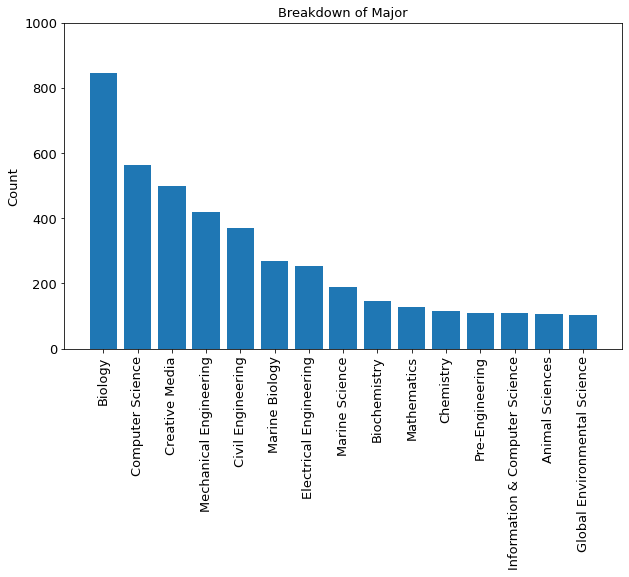

In [5]:
df_gb_major = df.groupby(by="MAJOR_DESC_IRO", as_index=False).count().sort_values(by='IRO_INSTITUTION', ascending=False).head(15)
df_gb_major['cumulative_sum'] = df_gb_major.IRO_INSTITUTION.cumsum() / df_gb_major.IRO_INSTITUTION.sum()

plt.figure(figsize=(10, 6))
plt.bar(df_gb_major.MAJOR_DESC_IRO, df_gb_major.IRO_INSTITUTION)
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
plt.ylim(0, 1000)
plt.ylabel('Count', fontsize=13)
plt.title('Breakdown of Major', fontsize=13)
plt.show()

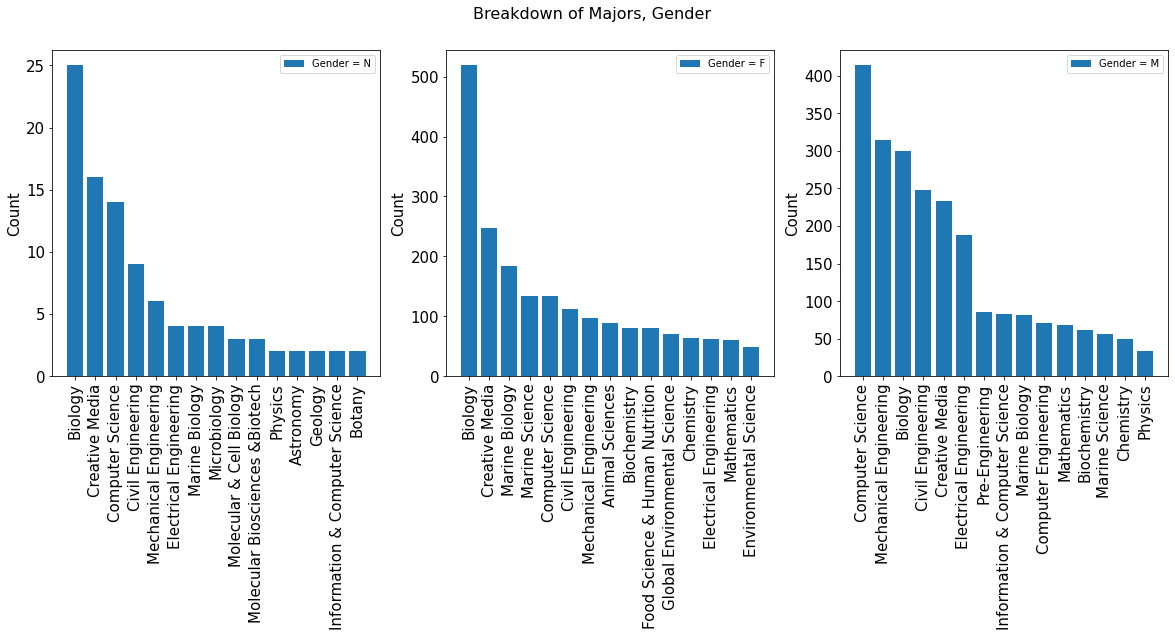

In [6]:
df_gender = df.groupby(['GENDER', 'MAJOR_DESC_IRO'], as_index=False).count()
df_gender_N = df_gender[df_gender['GENDER'] == 'N'].sort_values(by='IRO_INSTITUTION', ascending=False).head(15)
df_gender_M = df_gender[df_gender['GENDER'] == 'M'].sort_values(by='IRO_INSTITUTION', ascending=False).head(15)
df_gender_F = df_gender[df_gender['GENDER'] == 'F'].sort_values(by='IRO_INSTITUTION', ascending=False).head(15)

plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
plt.bar(df_gender_N.MAJOR_DESC_IRO, df_gender_N.IRO_INSTITUTION, label='Gender = N')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.legend()

plt.subplot(1, 3, 2)
plt.bar(df_gender_F.MAJOR_DESC_IRO, df_gender_F.IRO_INSTITUTION, label='Gender = F')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.legend()

plt.subplot(1, 3, 3)
plt.bar(df_gender_M.MAJOR_DESC_IRO, df_gender_M.IRO_INSTITUTION, label='Gender = M')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.legend()

plt.suptitle('Breakdown of Majors, Gender', fontsize=16)
plt.show()

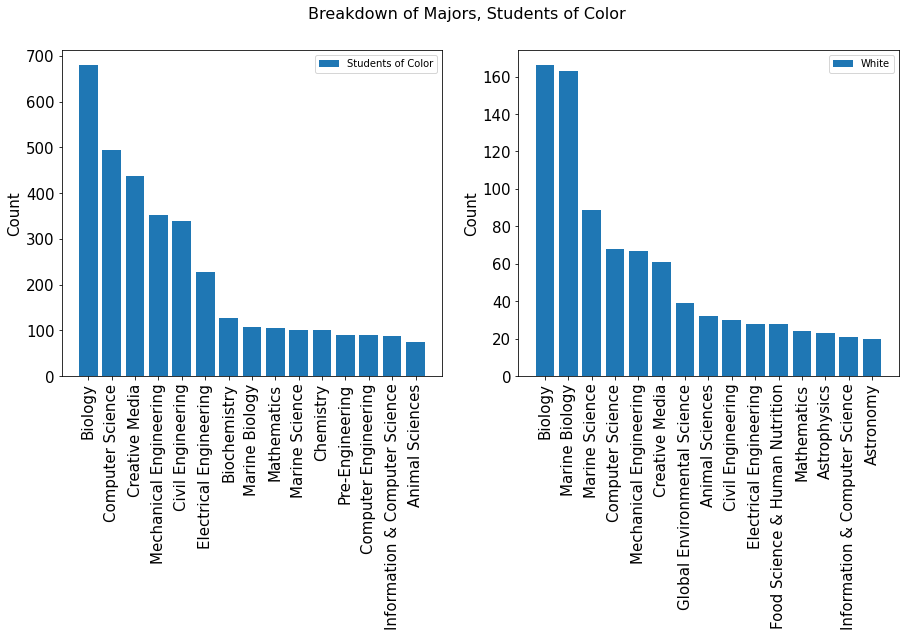

In [7]:
df_color = df.groupby(['IS_WHITE', 'MAJOR_DESC_IRO'], as_index=False).count()
df_color_white = df_color[df_color['IS_WHITE'] == 1].sort_values(by='IRO_INSTITUTION', ascending=False).head(15)
df_color_color = df_color[df_color['IS_WHITE'] == 0].sort_values(by='IRO_INSTITUTION', ascending=False).head(15)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.bar(df_color_color.MAJOR_DESC_IRO, df_color_color.IRO_INSTITUTION, label='Students of Color')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(df_color_white.MAJOR_DESC_IRO, df_color_white.IRO_INSTITUTION, label='White')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.legend()

plt.suptitle('Breakdown of Majors, Students of Color', fontsize=16)

plt.show()

In [8]:
df.AGE.describe()

count    5086.000000
mean       23.194062
std         5.224431
min        15.000000
25%        20.000000
50%        22.000000
75%        24.000000
max        62.000000
Name: AGE, dtype: float64

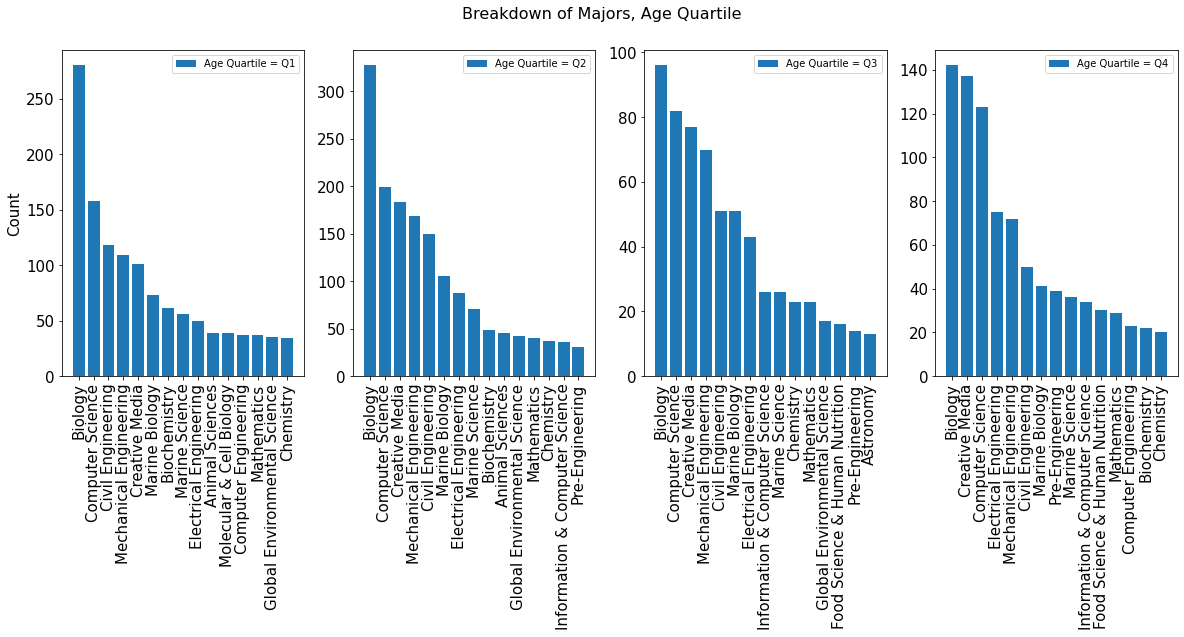

In [9]:
df_quartile = df.groupby(['quartile', 'MAJOR_DESC_IRO'], as_index=False).count()
df_quartile_q4 = df_quartile[df_quartile['quartile'] == 'Q4'].sort_values(by='IRO_INSTITUTION', ascending=False).head(15)
df_quartile_q3 = df_quartile[df_quartile['quartile'] == 'Q3'].sort_values(by='IRO_INSTITUTION', ascending=False).head(15)
df_quartile_q2 = df_quartile[df_quartile['quartile'] == 'Q2'].sort_values(by='IRO_INSTITUTION', ascending=False).head(15)
df_quartile_q1 = df_quartile[df_quartile['quartile'] == 'Q1'].sort_values(by='IRO_INSTITUTION', ascending=False).head(15)

plt.figure(figsize=(20, 6))
plt.subplot(1, 4, 1)
plt.bar(df_quartile_q1.MAJOR_DESC_IRO, df_quartile_q1.IRO_INSTITUTION, label='Age Quartile = Q1')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.legend()

plt.subplot(1, 4, 2)
plt.bar(df_quartile_q2.MAJOR_DESC_IRO, df_quartile_q2.IRO_INSTITUTION, label='Age Quartile = Q2')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.legend()

plt.subplot(1, 4, 3)
plt.bar(df_quartile_q3.MAJOR_DESC_IRO, df_quartile_q3.IRO_INSTITUTION, label='Age Quartile = Q3')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.legend()

plt.subplot(1, 4, 4)
plt.bar(df_quartile_q4.MAJOR_DESC_IRO, df_quartile_q4.IRO_INSTITUTION, label='Age Quartile = Q4')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.legend()

plt.suptitle('Breakdown of Majors, Age Quartile', fontsize=16)

plt.show()

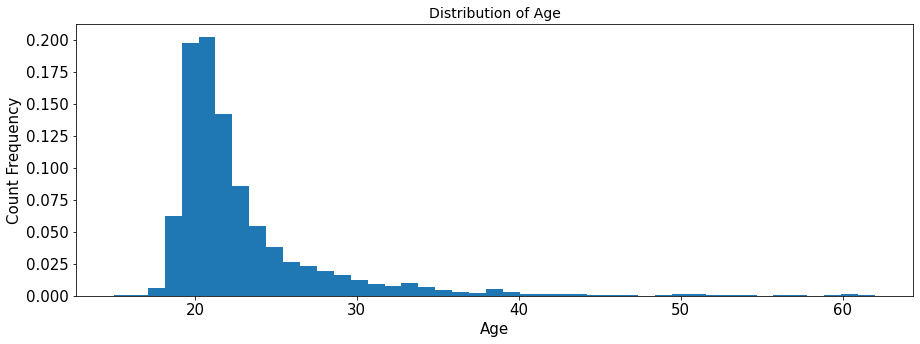

In [10]:
plt.figure(figsize=(15, 5))
plt.hist(df.AGE, bins=45, density=True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Count Frequency', fontsize=15)
plt.xlabel('Age', fontsize=15)
plt.title('Distribution of Age', fontsize=14)
plt.show()

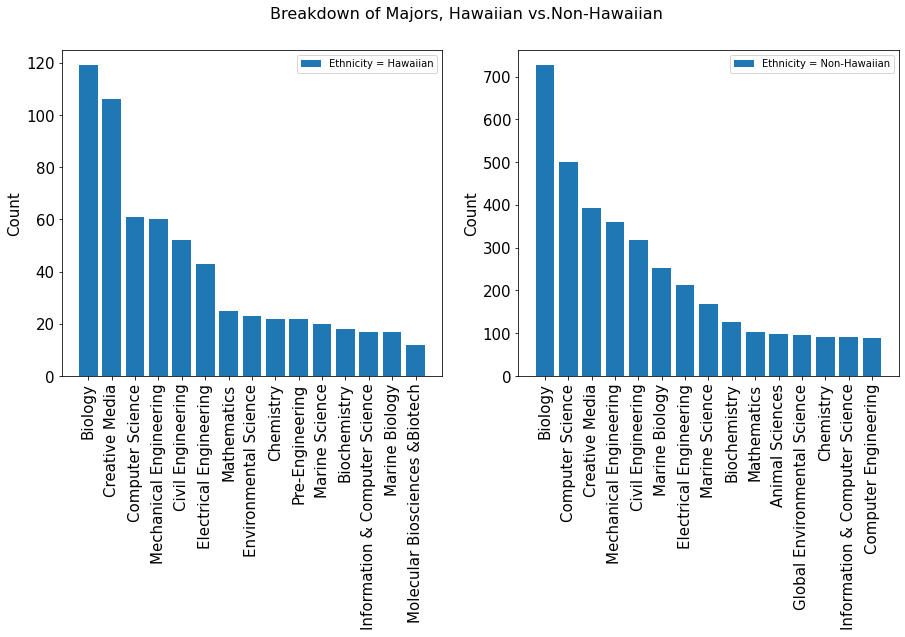

In [11]:
df_hwn = df.groupby(['HAWAIIAN_IRO', 'MAJOR_DESC_IRO'], as_index=False).count()
df_hwn_y = df_hwn[df_hwn['HAWAIIAN_IRO'] == 'Y'].sort_values(by='IRO_INSTITUTION', ascending=False).head(15)
df_hwn_n = df_hwn[df_hwn['HAWAIIAN_IRO'] == 'N'].sort_values(by='IRO_INSTITUTION', ascending=False).head(15)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.bar(df_hwn_y.MAJOR_DESC_IRO, df_hwn_y.IRO_INSTITUTION, label='Ethnicity = Hawaiian')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(df_hwn_n.MAJOR_DESC_IRO, df_hwn_n.IRO_INSTITUTION, label='Ethnicity = Non-Hawaiian')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.legend()

plt.suptitle('Breakdown of Majors, Hawaiian vs.Non-Hawaiian', fontsize=16)

plt.show()

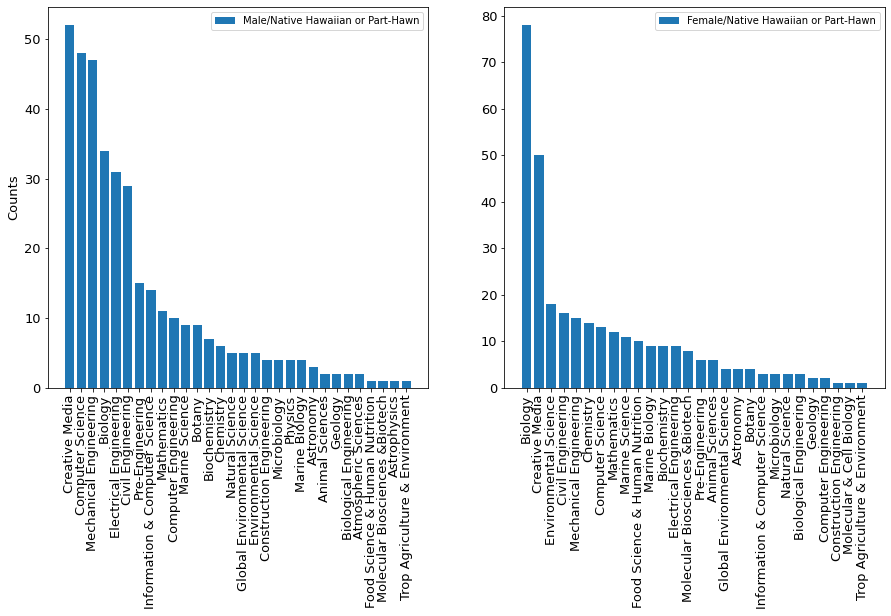

In [12]:
df1 = df[(df['GENDER'] == 'M') & 
         (df['ETHNICITY_DESC']== 'Native Hawaiian or Part-Hawn')].groupby('MAJOR_DESC_IRO', 
                                                                          as_index=False).count().sort_values(by='IRO_INSTITUTION', 
                                                                                                              ascending=False)

df2 = df[(df['GENDER'] == 'F') & 
         (df['ETHNICITY_DESC']== 'Native Hawaiian or Part-Hawn')].groupby('MAJOR_DESC_IRO', 
                                                                          as_index=False).count().sort_values(by='IRO_INSTITUTION', 
                                                                                                              ascending=False)
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.bar(df1['MAJOR_DESC_IRO'], df1['IRO_INSTITUTION'], label='Male/Native Hawaiian or Part-Hawn')
plt.xticks(rotation=90, fontsize=13)
plt.ylabel('Counts', fontsize=13)
plt.yticks(fontsize=13)
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(df2['MAJOR_DESC_IRO'], df2['IRO_INSTITUTION'], label='Female/Native Hawaiian or Part-Hawn')
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
plt.legend()
plt.show()

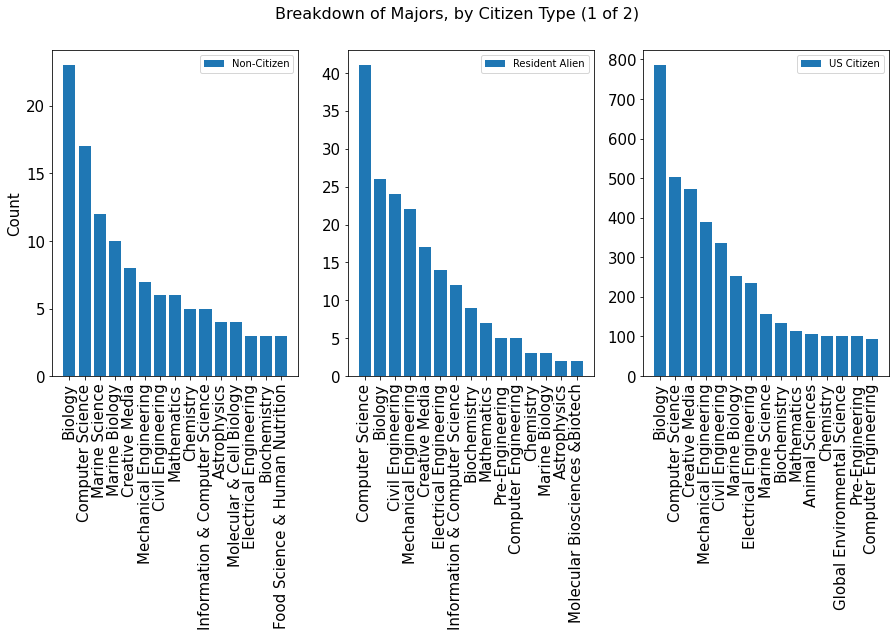

In [13]:
df_citizen = df.groupby(['citizen_clean', 'MAJOR_DESC_IRO'], as_index=False).count()
df_citizen_not = df_citizen[df_citizen['citizen_clean'] == 'Data not available'].sort_values(by='IRO_INSTITUTION', ascending=False).head(15)
df_citizen_nc = df_citizen[df_citizen['citizen_clean'] == 'Non-Citizen'].sort_values(by='IRO_INSTITUTION', ascending=False).head(15)
df_citizen_ra = df_citizen[df_citizen['citizen_clean'] == 'Resident Alien'].sort_values(by='IRO_INSTITUTION', ascending=False).head(15)
df_citizen_us = df_citizen[df_citizen['citizen_clean'] == 'US Citizen'].sort_values(by='IRO_INSTITUTION', ascending=False).head(15)
df_citizen_nat = df_citizen[df_citizen['citizen_clean'] == 'US National or CFAS Citizen'].sort_values(by='IRO_INSTITUTION', ascending=False).head(15)

rows = 1
cols = 3
plt.figure(figsize=(15, 6))

plt.subplot(rows, cols, 1)
plt.bar(df_citizen_nc.MAJOR_DESC_IRO, df_citizen_nc.IRO_INSTITUTION, label='Non-Citizen')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.legend()

plt.subplot(rows, cols, 2)
plt.bar(df_citizen_ra.MAJOR_DESC_IRO, df_citizen_ra.IRO_INSTITUTION, label='Resident Alien')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.legend()

plt.subplot(rows, cols, 3)
plt.bar(df_citizen_us.MAJOR_DESC_IRO, df_citizen_us.IRO_INSTITUTION, label='US Citizen')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.legend()

plt.suptitle('Breakdown of Majors, by Citizen Type (1 of 2)', fontsize=16)

plt.show()

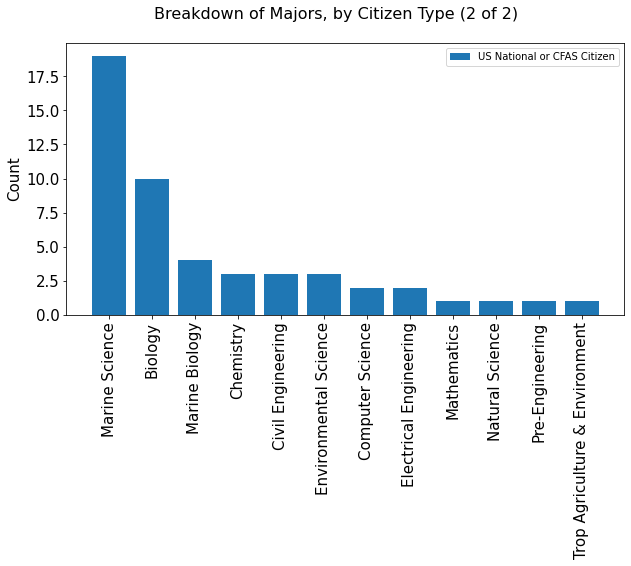

In [14]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 1, 1)
plt.bar(df_citizen_nat.MAJOR_DESC_IRO, df_citizen_nat.IRO_INSTITUTION, label='US National or CFAS Citizen')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.legend()
plt.suptitle('Breakdown of Majors, by Citizen Type (2 of 2)', fontsize=16)
plt.show()